## Outliners, Linear Regressions, and Correlations 

In [232]:
# import Dependencies
import pandas as pd
import csv as csv

import  numpy as np
import scipy as sts
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [233]:
# Path csv
path = "Resources/csv_files/movie_list.csv"

# Read in csv
csv = pd.read_csv(path)

# Need to fill empty sections with "Nan" so that we can use .dropna and remove rows with empty data

# set float("Nan") variable
nan_value = float("NaN")
# Use .replace to replace " "(empty data), with nan_value, inplace=True
csv.replace(" ", nan_value, inplace=True)
# Use .dropna with inplace=True to drop NaN values
csv.dropna(inplace=True)

In [234]:
# Creat clean csv 
clean_csv = csv
#clean_csv.head()

# Save clean_csv
clean_csv.to_csv("Resources/clean_csv.csv")

## Check for any Outliers from Total Profit amounts

In [235]:
# Confirm all data is equal
#clean_csv.count() # 563 total count

# Sort "Profit%" for quartile data
sorted_csv = clean_csv.sort_values("Profit%", ascending=True)

# Set variable to check for outliers
profit = sorted_csv["Profit%"]

<Figure size 504x360 with 0 Axes>

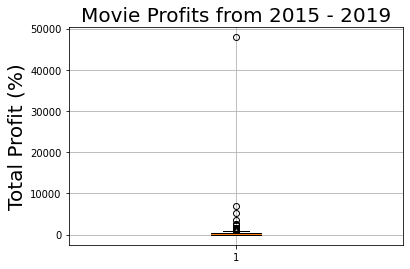

<Figure size 432x288 with 0 Axes>

In [236]:
# Set up for plot
plt.figure(figsize=(7, 5))
fig1, ax1 = plt.subplots()

# Assign titles and fontsize
ax1.set_title('Movie Profits from 2015 - 2019', fontsize=20)
ax1.set_ylabel('Total Profit (%)', fontsize=20)

# Set plot to profit
ax1.boxplot(profit)

# Add gird and display plot
plt.grid()
plt.show()

# Get quartiles, lower, upper and iqr
quartiles = profit.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Print results
# print(f"The lower quartile of movie profits is: {lowerq}")
# print(f"The upper quartile of movie profits is: {upperq}")
# print(f"The interquartile range of movie profits is: {iqr}")
# print(f"The median of movie profits is: {quartiles[0.5]} ")

# Get lower and upper bound figures
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Print results
# print(f"Values below {lower_bound} could be outliers.")
# print(f"Values above {upper_bound} could be outliers.")

# Save 
plt.savefig("Images/quartile_png")
plt.show()
plt.close()

## Quartile results for Movie Profit (%)

* The lower quartile of movie profits is: -26%

* The upper quartile of movie profits is: 289%

* The interquartile range of movie profits is: 315%

* The median of movie profits is: 82%

* Values below -500% could be outliers.

* Values above 763% could be outliers.

## Need to remove outlier 

* tconst: tt6108090 (Secret Supertar) needs to be removed as it an outlier with a gap over 40,000% from the rest of the population. 

In [237]:
# Use .grouby for ("genres") for bar chart later on so that it includes all genres
genres = clean_csv.groupby("genres")
# Create genres_count for bar chart
genres_count = genres["genres"].count()
#genres_count

In [238]:
# Using clean_csv use sort_values to "Profit" and ascending=False to identify highest profit (outlier)
clean_csv.sort_values("Profit%", ascending=False).head()


,Unnamed: 0,tconst,release_date,budget,revenue,genres,original_language,origin_country,production_countries name,spoken_languages name,Profit%
365,89,tt6108090,2017-10-19,286284,137416709,Drama,हिन्दी,IN,India,हिन्दी,47900.14
394,130,tt6777338,2017-06-08,125000,8737458,Drama,한국어/조선말,KR,South Korea,한국어/조선말,6889.97
35,35,tt2558022,2016-02-18,10000,525000,Action,Deutsch,DE,Germany,Deutsch,5150.00
90,95,tt4527664,2015-04-04,1500,53889,Comedy,English,US,United States of America,English,3492.60
254,140,tt5824826,2016-07-29,200000,5500000,Romance,తెలుగు,IN,India,తెలుగు,2650.00


In [239]:
# use drop for index 388 which is tt6108090 (outlier)
csv_without_outlier = clean_csv.drop([365])

In [240]:
csv_without_outlier.head()

# Using csv_without_outlier sort_values to "Profit" and ascending=False to confirm highest profit (outlier) has been removed
csv_without_outlier.sort_values("Profit%", ascending=False).head() # Removed and count is now 562

,Unnamed: 0,tconst,release_date,budget,revenue,genres,original_language,origin_country,production_countries name,spoken_languages name,Profit%
394,130,tt6777338,2017-06-08,125000,8737458,Drama,한국어/조선말,KR,South Korea,한국어/조선말,6889.97
35,35,tt2558022,2016-02-18,10000,525000,Action,Deutsch,DE,Germany,Deutsch,5150.00
90,95,tt4527664,2015-04-04,1500,53889,Comedy,English,US,United States of America,English,3492.60
254,140,tt5824826,2016-07-29,200000,5500000,Romance,తెలుగు,IN,India,తెలుగు,2650.00
457,39,tt5613484,2018-10-19,258158,6897446,Drama,English,US,United States of America,English,2571.79


In [241]:
# Save csv_witout_outliers
csv_without_outlier.to_csv("Resources/csv_without_outlier.csv")

## Linear Regressions

The r-squared is: 0.0009225283879834608


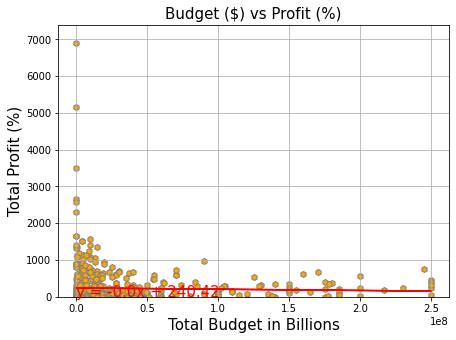

<Figure size 432x288 with 0 Axes>

In [242]:
# Set variables without outlier
budget = csv_without_outlier["budget"]
profit = csv_without_outlier["Profit%"]

# Set x and y values _df to extraxt from 
x_values =  budget
y_values =  profit

plt.figure(figsize=(7, 5))
# Create scatter plot and linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="h", color="orange", edgecolor="gray")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Assign labels
plt.title("Budget ($) vs Profit (%)", fontsize=15)
plt.xlabel("Total Budget in Billions", fontsize=15)
plt.ylabel("Total Profit (%)", fontsize=15)

plt.ylim(0, max(profit)+500)

# Retrieve r-squared value squared 
print(f"The r-squared is: {rvalue**2}")


# Display
plt.grid()


# Save scatter plot as png
plt.savefig("Images/budget_profit_png")

plt.show()
plt.tight_layout()

## Budget vs Profit 

With a Pearson's correlation of 0.00 we can state that zero correlation between a movies budget to profit. What we discovered is that the smaller the budget the larger a profit.

The r-squared is: 0.001281716978589647


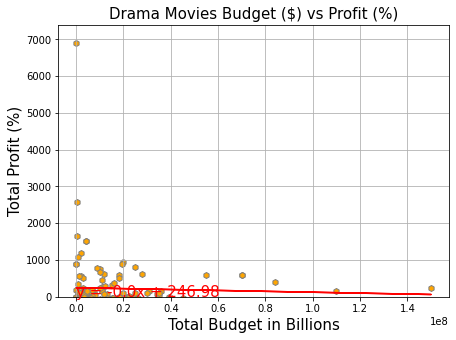

<Figure size 432x288 with 0 Axes>

In [243]:
drama_df = csv_without_outlier.loc[(csv_without_outlier["genres"] == "Drama")]

# Set variables
drama_budget = drama_df["budget"] 
drama_profit = drama_df["Profit%"]
# Set x and y values _df to extraxt from 
x_values =  drama_budget
y_values =  drama_profit

plt.figure(figsize=(7, 5))
# Create scatter plot and linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="h", color="orange", edgecolor="gray")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Assign labels
plt.title("Drama Movies Budget ($) vs Profit (%)", fontsize=15)
plt.xlabel("Total Budget in Billions", fontsize=15)
plt.ylabel("Total Profit (%)", fontsize=15)

plt.ylim(0, max(profit)+500)
# Retrieve r-squared value squared 
print(f"The r-squared is: {rvalue**2}")


# Display
plt.grid()


# Save scatter plot as png
plt.savefig("Images/drama_budget_profit_png")

plt.show()
plt.tight_layout()

The r-squared is: 0.0016649203065598436


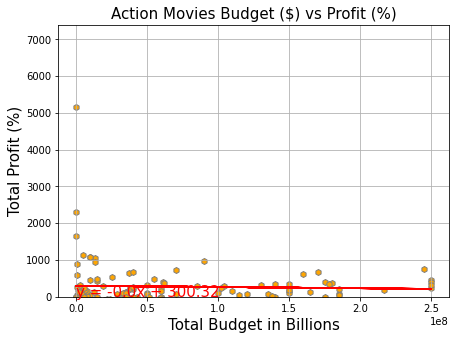

<Figure size 432x288 with 0 Axes>

In [244]:
action_df = csv_without_outlier.loc[(csv_without_outlier["genres"] == "Action")]

# Set variables
action_budget = action_df["budget"] 
action_profit = action_df["Profit%"]
# Set x and y values _df to extraxt from 
x_values =  action_budget
y_values =  action_profit

plt.figure(figsize=(7, 5))
# Create scatter plot and linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="h", color="orange", edgecolor="gray")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Assign labels
plt.title("Action Movies Budget ($) vs Profit (%)", fontsize=15)
plt.xlabel("Total Budget in Billions", fontsize=15)
plt.ylabel("Total Profit (%)", fontsize=15)

plt.ylim(0, max(profit)+500)
# Retrieve r-squared value squared 
print(f"The r-squared is: {rvalue**2}")


# Display
plt.grid()


# Save scatter plot as png
plt.savefig("Images/action_budget_profit_png")

plt.show()
plt.tight_layout()

The r-squared is: 0.011347319412309065


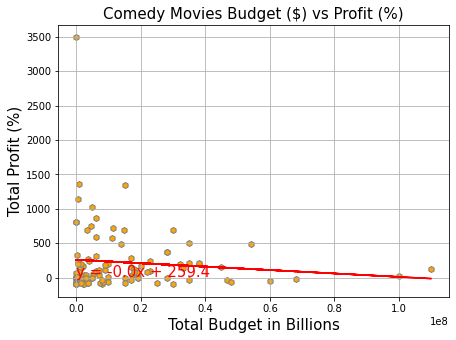

<Figure size 432x288 with 0 Axes>

In [245]:
comedy_df = csv_without_outlier.loc[(csv_without_outlier["genres"] == "Comedy")]


# Set variables
comedy_budget = comedy_df["budget"] 
comedy_profit = comedy_df["Profit%"]
# Set x and y values _df to extraxt from 
x_values =  comedy_budget
y_values =  comedy_profit

plt.figure(figsize=(7, 5))
# Create scatter plot and linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="h", color="orange", edgecolor="gray")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Assign labels
plt.title("Comedy Movies Budget ($) vs Profit (%)", fontsize=15)
plt.xlabel("Total Budget in Billions", fontsize=15)
plt.ylabel("Total Profit (%)", fontsize=15)

# Retrieve r-squared value squared 
print(f"The r-squared is: {rvalue**2}")


# Display
plt.grid()


# Save scatter plot as png
plt.savefig("Images/comedy_budget_profit_png")

plt.show()
plt.tight_layout()

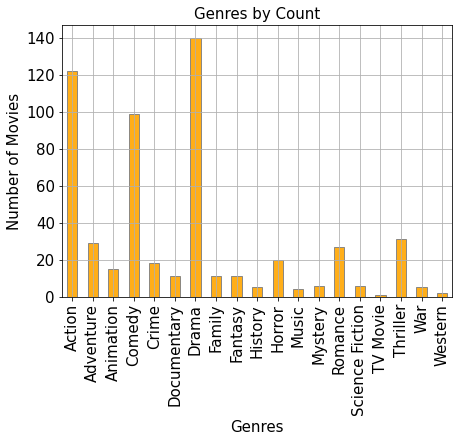

<Figure size 432x288 with 0 Axes>

In [132]:
# Create bar chart using genres_chart 
genres_chart = genres_count.plot(kind='bar', color="orange", edgecolor="gray", figsize=(7, 5), fontsize=15, alpha=0.90)

# Assign labels
genres_chart.set_title("Genres by Count", fontsize=15)
genres_chart.set_xlabel("Genres", fontsize=15)
genres_chart.set_ylabel("Number of Movies", fontsize=15)

# Add grid
plt.grid()



# save plot
plt.savefig("Images/genres_by_count_png")

# Display chart with tight_layout()
plt.show()
plt.tight_layout()

## Genres by Count

Most popular movies being made in our study were Drama with 140 movies, Action with 122 movies, and Comedy with 99 movies. The least popular were TV Movies with 1 movie, Western with 2 movies, and Music with 4 movies.

In [133]:
# per_genre = csv_without_outlier.loc[(csv_without_outlier["genres"] == "Action") |
#                                     (csv_without_outlier["genres"] == "Adventure") |
#                                     (csv_without_outlier["genres"] == "Animation") |
#                                     (csv_without_outlier["genres"] == "Comedy") |
#                                     (csv_without_outlier["genres"] == "Crime") |
#                                     (csv_without_outlier["genres"] == "Documentary") |
#                                     (csv_without_outlier["genres"] == "Drama") |
#                                     (csv_without_outlier["genres"] == "Family") |
#                                     (csv_without_outlier["genres"] == "Fantasy") |
#                                     (csv_without_outlier["genres"] == "History") |
#                                     (csv_without_outlier["genres"] == "Horror") |
#                                     (csv_without_outlier["genres"] == "Music") |
#                                     (csv_without_outlier["genres"] == "Mystery") |
#                                     (csv_without_outlier["genres"] == "Romance") |
#                                     (csv_without_outlier["genres"] == "Science Fiction") |
#                                     (csv_without_outlier["genres"] == "TV Movies") |
#                                     (csv_without_outlier["genres"] == "Thriller") |
#                                     (csv_without_outlier["genres"] == "War") |
#                                     (csv_without_outlier["genres"] == "Western"), :]

In [134]:
genres_described = genres.describe()
genres_described

Unnamed: 0                                              \
                     count        mean        std   min     25%    50%   
genres                                                                   
Action               122.0   56.655738  39.383633   1.0   27.00   48.0   
Adventure             29.0   59.000000  47.481575   2.0   19.00   42.0   
Animation             15.0   63.800000  43.124736   8.0   32.00   51.0   
Comedy                99.0   65.242424  40.712303   1.0   31.00   66.0   
Crime                 18.0   46.500000  27.077775   1.0   27.50   45.0   
Documentary           11.0  115.454545  42.017529   3.0  111.00  120.0   
Drama                140.0   68.485714  40.319316   0.0   40.50   67.0   
Family                11.0   72.181818  48.801267   4.0   32.00   80.0   
Fantasy               11.0   42.636364  31.401505   7.0   13.50   37.0   
History                5.0   93.200000  24.762875  72.0   78.00   84.0   
Horror                20.0   66.650000  44.521166   2.0   31.25   65.5   
Music                  4.0   67.750000  46.928137   9.0   42.75   72.5   
Mystery                6.0   72.833333  40.848093  10.0   51.25   82.0   
Romance               27.0   74.444444  40.662148   7.0   50.50   74.0   
Science Fiction        6.0   30.833333  19.198090   8.0   18.50   26.5   
TV Movie               1.0   16.000000        NaN  16.0   16.00   16.0   
Thriller              31.0   61.419355  39.051909   0.0   39.50   57.0   
War                    5.0   54.000000  39.389085   5.0   26.00   65.0   
Western                2.0   33.500000   9.192388  27.0   30.25   33.5   

                               budget                ...       revenue  \
                    75%    max  count          mean  ...           75%   
genres                                               ...                 
Action            79.75  152.0  122.0  6.066475e+07  ...  2.740048e+08   
Adventure         88.00  154.0   29.0  6.033226e+07  ...  2.258742e+08   
Animation         87.00  160.0   15.0  3.202523e+07  ...  5.815103e+07   
Comedy            96.50  155.0   99.0  1.498407e+07  ...  4.428966e+07   
Crime             60.50   93.0   18.0  2.094433e+07  ...  4.583320e+07   
Documentary      138.00  168.0   11.0  2.746501e+05  ...  1.442080e+06   
Drama             92.25  169.0  140.0  1.396778e+07  ...  3.166225e+07   
Family            99.00  162.0   11.0  3.529545e+07  ...  6.034024e+07   
Fantasy           67.50  101.0   11.0  4.791822e+07  ...  1.391970e+08   
History           98.00  134.0    5.0  6.340000e+06  ...  2.252567e+07   
Horror            94.00  163.0   20.0  1.282129e+07  ...  7.899885e+07   
Music             97.50  117.0    4.0  8.343470e+06  ...  3.391866e+07   
Mystery           93.25  125.0    6.0  1.966675e+07  ...  1.241378e+08   
Romance          108.50  140.0   27.0  1.120418e+07  ...  1.637083e+07   
Science Fiction   44.25   58.0    6.0  1.043333e+08  ...  3.935634e+08   
TV Movie          16.00   16.0    1.0  5.000000e+06  ...  4.200000e+07   
Thriller          76.00  157.0   31.0  1.435265e+07  ...  3.332339e+07   
War               68.00  106.0    5.0  1.328722e+07  ...  7.900000e+06   
Western           36.75   40.0    2.0  2.300000e+07  ...  9.859256e+06   

                              Profit%                                   \
                          max   count        mean          std     min   
genres                                                                   
Action           2.068224e+09   122.0  279.675574   574.458907  -99.97   
Adventure        7.965760e+08    29.0  211.951034   240.892965  -99.89   
Animation        5.175269e+08    15.0   88.945333   121.583482  -87.18   
Comedy           3.206893e+08    99.0  222.123030   462.119746  -99.31   
Crime            1.557601e+08    18.0   96.952778   222.113047  -99.96   
Documentary      7.123919e+06    11.0  243.172727   439.672673  -93.33   
Drama            4.885337e+08   140.0  570.206643  4088.630601  -99.97   
Family           5

In [ ]:
# for genre in genres_grouped:
#     each_genre = genres_grouped.loc[genres_grouped[:0] == genre, "Profit%"]
#     genre_list.append(each_genre)
    
#     # Calculate the IQR and quantitatively determine if there are any potential outliers. 
#     quartiles = genres_grouped["Profit%"].quantile([.25, .50, .75])
#     lowerq = quartiles[0.25]
#     upperq = quartiles[0.75]
#     iqr = upperq-lowerq
    
# # print quartiles
# print(f"The lower quartile of the Tumor Volume (mm3) is: {lowerq}")
# print(f"The upper quartile of the Tumor Volume (mm3) is: {upperq}")
# print(f"The interquartile range of the Tumor Volume (mm3) is: {iqr}")
# print(f"The median of Tumor Volume (mm3) is: {quartiles[0.50]}")

# #Determine outliers using upper and lower bounds
# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)

# # print potential outliners
# print(f"Values below {lower_bound} could be outliners.")
# print(f"Values above {upper_bound} could be outliners.")

In [248]:
# # Create variable

# genre_tickers = ["Action", "Adventure", "Animation", "Comedy", "Crime", "Documentary", "Drama", 
#                  "Family", "Fantasy", "History", "Horror", "Music", "Mystery", "Romance", 
#                  "Science Fiction", "TV Movies", "Thriller", "War", "Western"]

# props = dict(markerfacecolor="orange", marker="o")

# fig1, ax1 = plt.subplots()

# # Set labels
# ax1.set_title("Genre by Profit (%)")
# ax1.set_xlabel("Genre")
# ax1.set_ylabel("Profit (%)")

# # Create box plot
# ax1.set_ylim(10, 100)
# ax1.boxplot(genre_list, labels=genre_tickers, flierprops=props)

In [250]:
# correlation = sts.pearsonr(volume_weight[" "], volume_weight[" "])
# print(f"The correlation coefficient between both factors is {round(correlation[0],2)}")